## SVM Kernel Practical Implementation

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2) #Equation if circle
y=np.hstack([y,-y]) #Full circle
x=np.hstack([x,-x]) #Full circle

In [10]:
print(x)
print(x.shape)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [9]:
print(y)
print(y.shape)

[ 8.66025404  8.71779204  8.77378994  8.82827705  8.88128118  8.93282873
  8.98294476  9.03165312  9.07897646  9.12493632  9.16955321  9.21284664
  9.25483518  9.29553652  9.3349675   9.37314414  9.41008171  9.44579475
  9.4802971   9.51360192  9.54572176  9.57666854  9.60645359  9.63508769
  9.66258107  9.68894344  9.714184    9.73831149  9.76133416  9.7832598
  9.80409577  9.82384901  9.84252604  9.86013297  9.87667553  9.89215905
  9.90658851  9.91996849  9.93230325  9.94359667  9.9538523   9.96307334
  9.97126266  9.9784228   9.98455598  9.98966408  9.99374868  9.99681104
  9.99885209  9.99987246  9.99987246  9.99885209  9.99681104  9.99374868
  9.98966408  9.98455598  9.9784228   9.97126266  9.96307334  9.9538523
  9.94359667  9.93230325  9.91996849  9.90658851  9.89215905  9.87667553
  9.86013297  9.84252604  9.82384901  9.80409577  9.7832598   9.76133416
  9.73831149  9.714184    9.68894344  9.66258107  9.63508769  9.60645359
  9.57666854  9.54572176  9.51360192  9.4802971   9.4

In [11]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

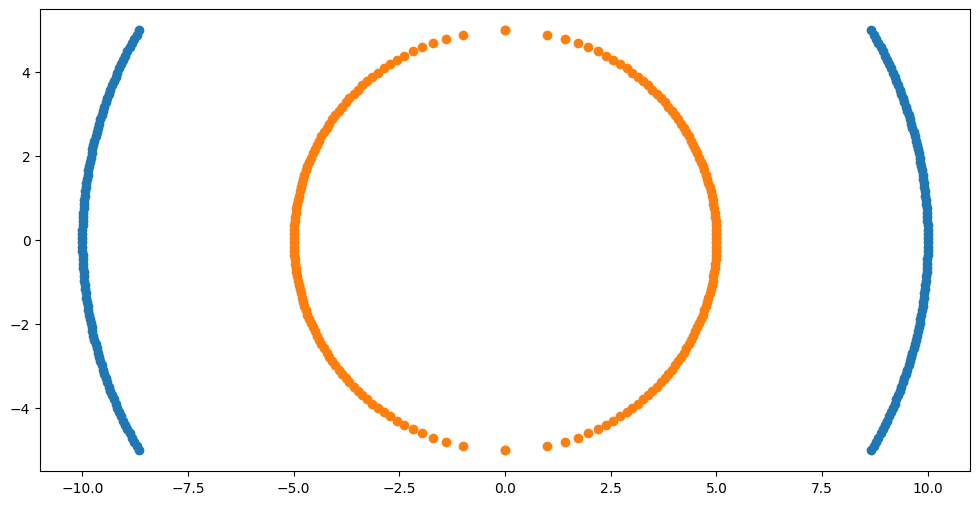

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(y,x)
plt.scatter(y1,x1)

In [24]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [26]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [27]:
X = df[['X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [29]:
X_train.head()

,X1_Square,X2_Square,X1*X2
50,24.997449,0.002551,0.252512
63,98.140496,1.859504,13.508984
112,10.651974,14.348026,-12.362637
159,99.079176,0.920824,9.551676
83,13.549638,11.450362,12.455852


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
!pip install plotly

In [32]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [33]:
import plotly.express as px
import plotly.express as px
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2',
              color='Y')
fig.show()
plt.show()


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
y_pred=classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [40]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [41]:
X=df.iloc[:,0:2]
y=df.Y

In [42]:
X.head()

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596


In [43]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [44]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)


SVC()

In [45]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [46]:
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)


SVC(kernel='poly')

In [47]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [48]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [49]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.76